In [1]:
##############################################################################################################
# make_moea_output_plots.py - python script to create plots for multi-objective optimization outputs
# Project started March 2018, last update May 2020
##############################################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sbn
import importlib
from datetime import datetime

In [2]:
### Project functions ###
import functions_moea_output_plots


sbn.set_style('white')
sbn.set_context('paper', font_scale=1.55)

eps = 1e-13
startTime = datetime.now()

dir_generated_inputs = './../../data/generated_inputs/'
dir_moea_output = './../../data/optimization_output/'
dir_figs = './../../figures/'

# get runtime metrics for moea runs with different number of RBFs (nrbfs)
print('Getting runtime metrics for moea runs with different number of RBFs..., ',
      datetime.now() - startTime)
importlib.reload(functions_moea_output_plots)
metrics = {}
nrbfs = (1, 2, 3, 4, 8, 12)
for nrbf in nrbfs:
    metrics[str(nrbf)+'rbf'] = []
    for s in range(1, 11):
        metrics[str(nrbf)+'rbf'].append(functions_moea_output_plots.getMetrics(dir_moea_output + '4obj_' + str(nrbf) +
                                                                              'rbf/metrics/DPS_param150_seedS1_seedB' + str(s) + '.metrics',
                                                                              '../../data/optimization_output/4obj_rbf_overall/DPS_4obj_rbf_overall_borg.hypervolume'))

Getting runtime metrics for moea runs with different number of RBFs...,  0:00:00.000065


In [3]:
metrics['1rbf'][0]['Hypervolume']

0     0.725138
1     0.766767
2     0.804575
3     0.816193
4     0.824316
        ...   
95    0.976118
96    0.976135
97    0.977159
98    0.977216
99    0.978055
Name: Hypervolume, Length: 100, dtype: float64

Plotting hypervolume (fig S1)...,  0:00:00.255469


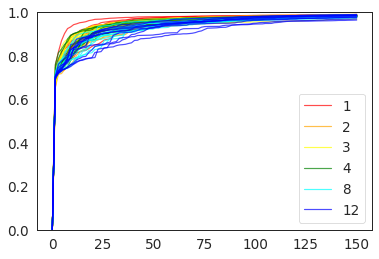

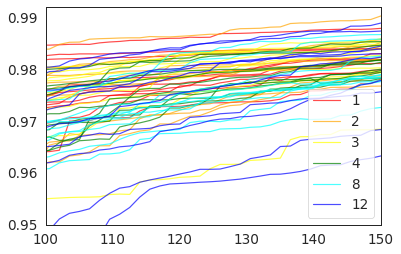

In [4]:
# ### plot hypervolume for baseline (50 seeds) + sample of 12 sensitivity analysis runs (10 seeds) (fig S4)
print('Plotting hypervolume (fig S1)..., ', datetime.now() - startTime)
importlib.reload(functions_moea_output_plots)
nfe = 150000
fe_prints = 100
fe_grid = np.arange(0, nfe+1, nfe/fe_prints)
nseed = 10
functions_moea_output_plots.plot_metrics(dir_figs, metrics, nrbfs, nseed, fe_grid)

In [5]:
### get ref sets
importlib.reload(functions_moea_output_plots)
formulation = '4obj_2rbf_moreSeeds'
ref_dps_4obj_retest = functions_moea_output_plots.getSet(dir_moea_output + formulation + '/DPS_' + formulation + '_borg_retest.resultfile', 4)
ref_dps_4obj_retest.head()


,dv1,dv2,dv3,dv4,dv5,dv6,dv7,dv8,dv9,dv10,...,maxDebt,maxComplex,maxFund,constraint,annRevNorm,maxDebtNorm,maxComplexNorm,maxFundNorm,totalDistance2obj,totalDistance4obj
0,0.249731,0.942665,-0.298897,0.115451,-0.999623,-0.001667,-0.409079,0.501504,0.060590,-0.807356,...,11.144381,0.55122,137.778275,0.0,1.000000,0.290645,0.532861,1.000000,1.041381,1.538966
1,0.194214,0.770282,-0.730258,0.166304,0.618815,0.590237,0.026351,0.449970,-0.105783,-0.644324,...,9.182104,0.73266,114.485576,0.0,0.884709,0.224467,0.721724,0.830941,0.912741,1.429840
2,0.173552,0.125868,-0.057646,0.329365,0.201947,-0.813038,-0.825433,0.712244,0.239426,0.626809,...,2.532649,1.00000,18.880194,0.0,0.863946,0.000214,1.000000,0.137033,0.863946,1.328601
3,0.193975,0.129759,-0.106900,0.796660,-0.490166,-0.662118,0.324866,0.442572,-0.461369,-0.358291,...,2.542426,1.00000,19.463910,0.0,0.846946,0.000543,1.000000,0.141270,0.846946,1.318057
4,0.134479,0.079952,-0.377498,-0.826247,-0.265407,-0.672150,-0.464706,-0.058890,0.989735,-0.251029,...,2.967172,1.00000,11.992765,0.0,0.844620,0.014868,1.000000,0.087044,0.844750,1.311938


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<Figure size 432x288 with 0 Axes>

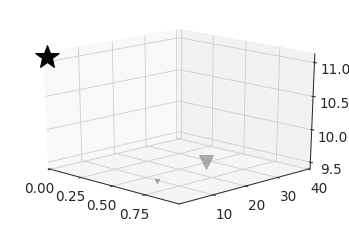

In [13]:
### get 3d plot limits
importlib.reload(functions_moea_output_plots)
lims, lims3d = functions_moea_output_plots.get_plot_limits(ref_dps_4obj_retest, ref_dps_4obj_retest)

### 3d plot (4 objectives) of dps vs 2dv formulation
# functions_moea_output_plots.plot_formulations_4obj(ref_dps_4obj_retest, ref_dps_4obj_retest, lims3d, dir_figs)

### plot min/max marker sizes for use in legend (combine in illustrator)
functions_moea_output_plots.plot_marker_size_4obj(ref_dps_4obj_retest, ref_dps_4obj_retest, lims3d, dir_figs)


In [15]:
importlib.reload(functions_moea_output_plots)
functions_moea_output_plots.plot_subproblems(ref_dps_4obj_retest, lims3d, dir_moea_output, dir_figs)

FileNotFoundError: [Errno 2] File ./../../data/optimization_output/DPS_subproblems/DPS_1234_pareto.reference does not exist: './../../data/optimization_output/DPS_subproblems/DPS_1234_pareto.reference'